In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
dtime=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\delivery_time.csv')

In [40]:
dtime.columns=['deliverytime','sortingtime']
dtime.head()

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<BarContainer object of 21 artists>

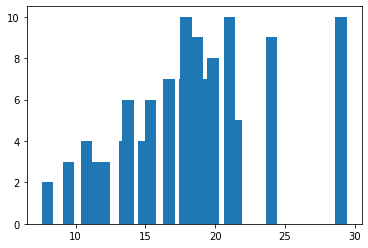

In [41]:
plt.bar('deliverytime','sortingtime', data=dtime)

In [42]:
#finding inconsistent datatype and missing data
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deliverytime  21 non-null     float64
 1   sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [78]:
#value in the 4th row is abnormal in the boxplot
dtime1=dtime.drop(dtime.index[[4]],axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x28ecd5afa90>,
 'caps': [<matplotlib.lines.Line2D at 0x28ecd5bb220>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ecd5af700>],
 'medians': [<matplotlib.lines.Line2D at 0x28ecd5bb940>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ecd5bbcd0>],
 'means': []}

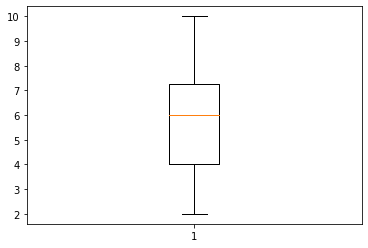

In [79]:
plt.boxplot(dtime1['sortingtime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28ecd626490>,
 'caps': [<matplotlib.lines.Line2D at 0x28ecd626be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ecd626100>],
 'medians': [<matplotlib.lines.Line2D at 0x28ecd632340>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ecd6326d0>],
 'means': []}

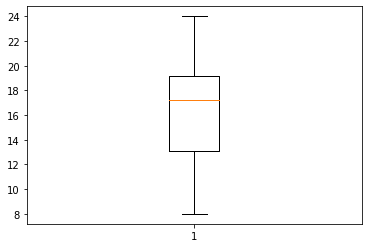

In [80]:
plt.boxplot(dtime1['deliverytime'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliverytime', ylabel='Density'>

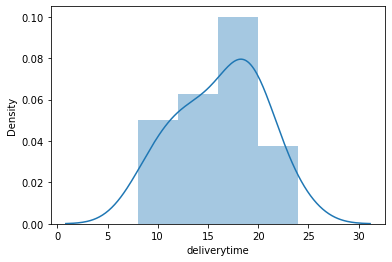

In [81]:
sns.distplot(dtime1["deliverytime"])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

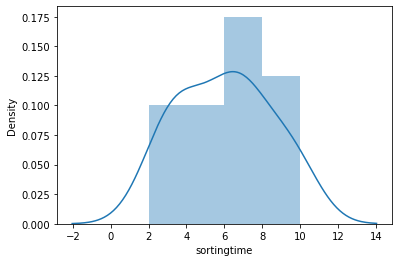

In [82]:
sns.distplot(dtime1["sortingtime"])

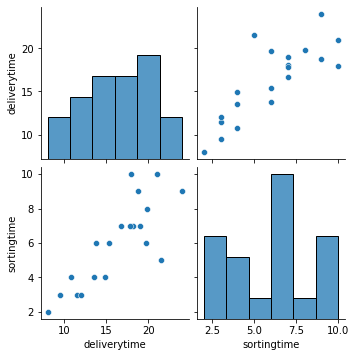

In [83]:
sns.pairplot(dtime1)

In [84]:
#finding correlation
dtime1.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.812531
sortingtime,0.812531,1.000000


In [85]:
#fitting in a linear regression model
import statsmodels.formula.api as smf
model=smf.ols("deliverytime~sortingtime",data=dtime1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.97
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.35e-05
Time:                        19:04:58   Log-Likelihood:                -46.449
No. Observations:                  20   AIC:                             96.90
Df Residuals:                      18   BIC:                             98.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.5342      1.574      4.788      0.000       4.228      10.840
sortingtime     1.4411      0.244      5.914      0.000       0.929       1.953
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.289
Skew:                           0.906   Prob(JB):                        0.193
Kurtosis:                       3.816   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

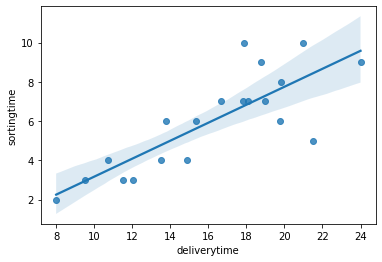

In [86]:
sns.regplot(x="deliverytime", y="sortingtime", data=dtime1);

In [87]:
#r squared value is less than 0.8, model is not strong
#trying a different regression model

In [88]:
y=dtime1[['deliverytime']]
x=dtime1[['sortingtime']]

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)


In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred=lr.predict(x_test)
y_test, y_pred

(    deliverytime
 2          19.75
 7           9.50
 18          8.00
 17         18.11
 12         16.68
 15         14.88
 10         19.83
 13         11.50
 14         12.03
 6          19.00,
 array([[16.286],
        [12.845],
        [11.698],
        [17.433],
        [17.433],
        [13.992],
        [18.58 ],
        [12.845],
        [12.845],
        [17.433]]))

In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

4.516864599999997

In [111]:
lr.score(x_test,y_test)

0.7414048691768266